###### Disclaimer: While the case is real, data modified for educational purposes.

##### Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

##### She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem! Your neighbor then gives you some information about a bunch of houses in regions of the United States, it is all in the data set: USA_Housing.csv.

###### The data contains the following columns:
###### 'Avg. Area Income': Avg. Income of residents of the city house is located in.
###### 'Avg. Area House Age': Avg Age of Houses in same city 'Avg. ‘
###### 'Area Number of Rooms': Avg Number of Rooms for Houses in same city 'Avg.
###### 'Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city.
###### 'Area Population': Population of city house is located in
###### 'Price': Price that the house sold at
###### 'Address': Address for the house.

# Step 1: Load and Prepare the Dataset

In [256]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\\Users\\aliev\\OneDrive\\Desktop\\datasets\\USA_Housing.csv")

In [257]:
df.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# Step 2: Data Exploration and Understanding

In [258]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [259]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [260]:
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

# Step 3: Data Preprocessing

In [261]:
df.columns = [col.replace(".", "") for col in df.columns]
df.columns = [col.replace(" ", "_") for col in df.columns]
df.columns

housing_df = df.drop(columns=['Address'])
housing_df

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


# Step 4: Feature Engineering

In [262]:
X = housing_df.drop(columns=['Price']) # feautures 
y = housing_df['Price'] # target

# Step 5: Train-Test Split

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Scale the data using Standard Scaler

In [264]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_test_scaled.round(decimals=2)
X_train_scaled.round(decimals=2)

array([[-0.19, -0.13, -0.13,  0.12, -0.83],
       [-1.39,  0.43,  0.8 , -0.56,  1.16],
       [-0.35,  0.47,  1.7 ,  0.03, -0.32],
       ...,
       [-0.22,  0.54, -0.36, -0.69,  0.12],
       [-0.92,  1.43,  2.27,  0.28,  1.39],
       [-0.69, -0.08,  0.89,  1.68, -0.01]])

# Step 6: Train the Linear Regression Model

In [265]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

# Step 7: Make Predictions

In [266]:
y_pred_scaled = model.predict(X_test_scaled)
y_pred_scaled.round(decimals=1)

array([1308587.9, 1237037.2, 1243429.3, 1228900.2, 1063320.9, 1544058.1,
       1094774.7,  833284.7,  788412.9, 1469714.9,  671728.4, 1606818.2,
       1004166.6, 1796799. , 1288567. , 1087782.9, 1423072.4, 1078178.7,
        802286. ,  930761. , 1134829.9,  916398.4, 1489972.7, 1284580.2,
       1582071.4, 1132519.2, 1089888.4,  974510.5,  924058. , 1740759.7,
       1286481.6, 1621290. , 1435264.2, 1234014.8, 1485434.6, 1718335. ,
       1538953.7,  777106.6, 1765201.5, 1175972.1, 1553707.9,  897703.7,
       1371049.8,  845281.7, 1201022.9, 1133286. , 1363128.1, 1449814.1,
       1574363.9, 1233577.5, 1484464. , 1295276.6, 1222136.8,  990124.4,
       1693825. , 1823785.1, 1136495.6, 1282164.4, 1327292.1, 1353355.5,
        966265.4,  661906.6, 1533750.6, 1002479.8,  995799.8, 1567349.6,
       1500813.6, 1090078. , 1820964.8, 1479856.2,  902785.3, 1494542.2,
       1378859.3,  962610.9,  712800.8, 1565650.4, 1149219. ,  931311.2,
       1600924. ,  506875.4, 1592924. , 1292023.5, 

# Step 8: Evaluate the Model

In [267]:
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
print(f'Mean Squared Error: {mse_scaled.round(decimals=1)}')

r2_scaled = r2_score(y_test, y_pred_scaled)
print(f"R²: {r2_scaled:.2f}")


Mean Squared Error: 10089009300.9
R²: 0.92


# Step 9: Visualization

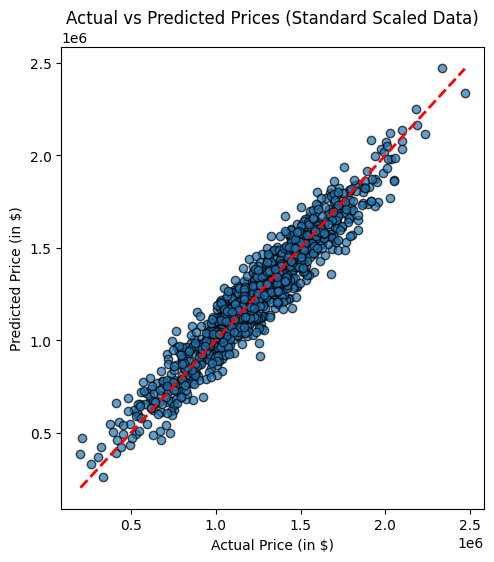

In [268]:
# Visualize the results
plt.figure(figsize=(12, 6))

# Plotting actual vs predicted prices
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_scaled, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price (in $)')
plt.ylabel('Predicted Price (in $)')
plt.title('Actual vs Predicted Prices (Standard Scaled Data)')
plt.show()